## Summary of Machine Learning

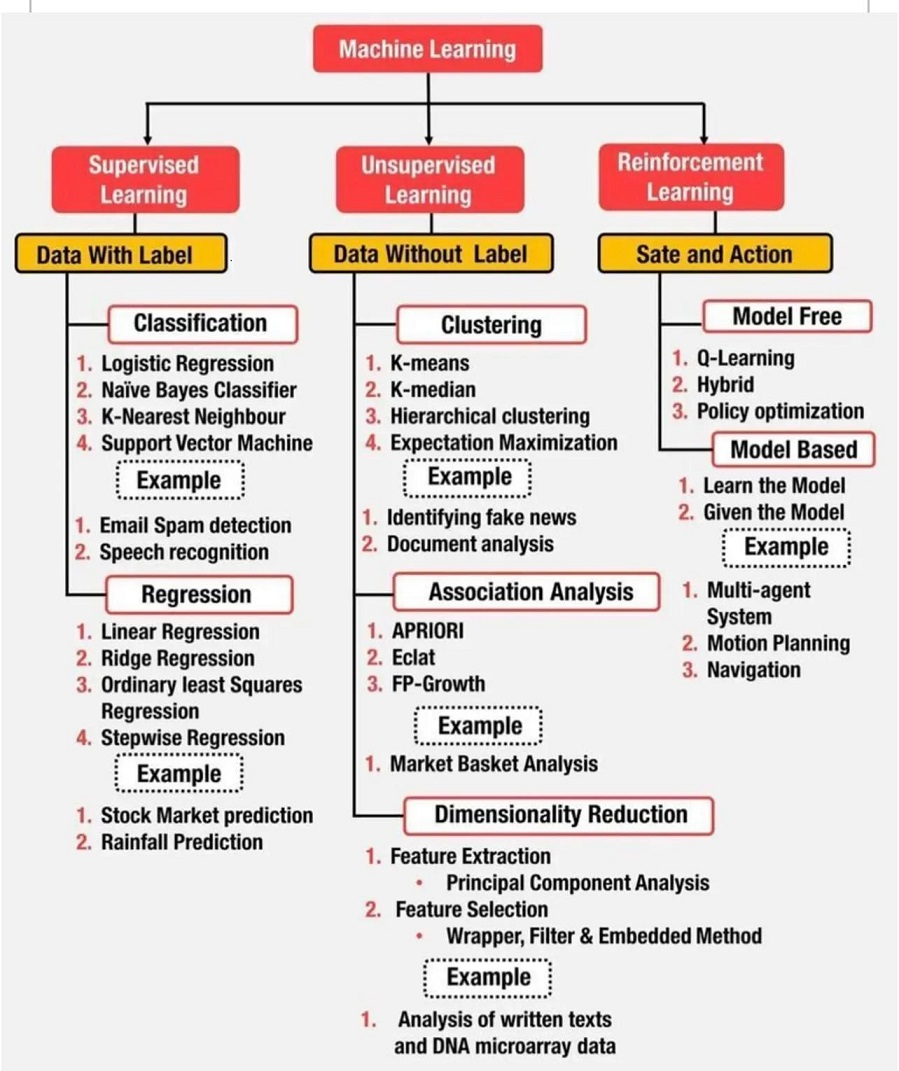

## Supervised Learning Summary

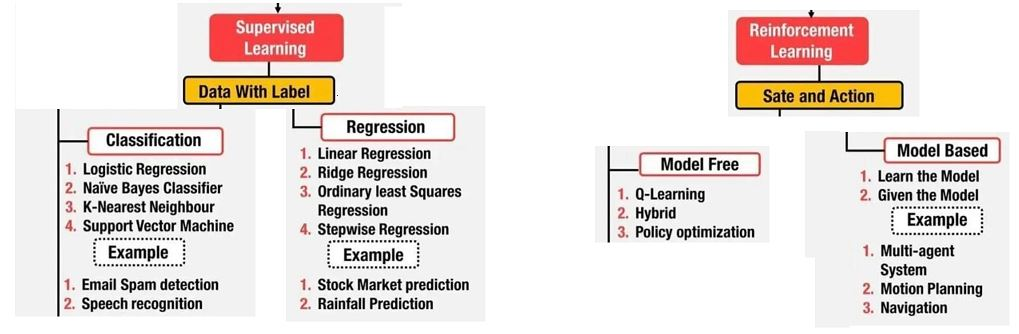

<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

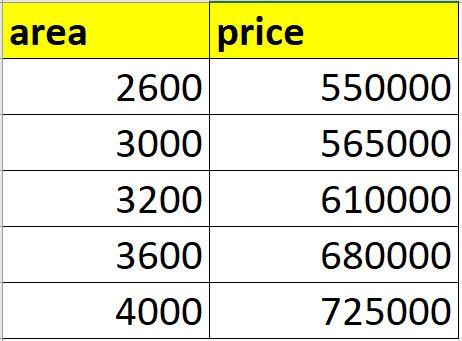

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

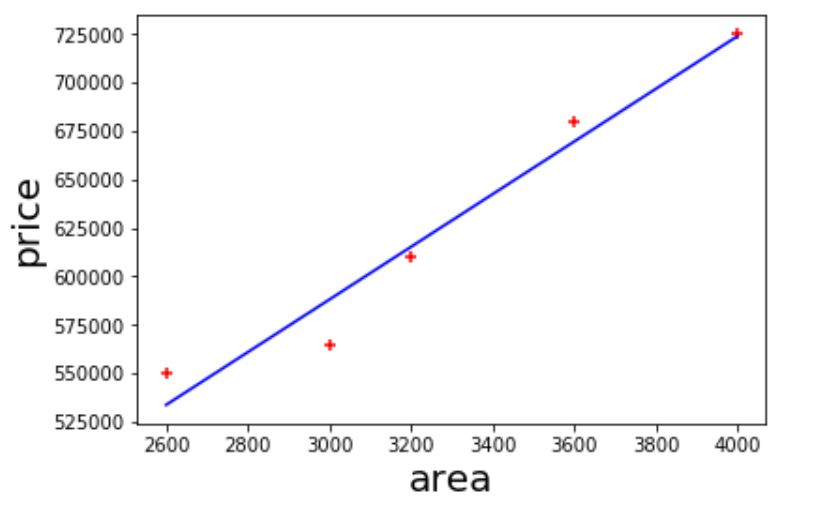

You can draw multiple lines like this but we choose the one where total sum of error is minimum

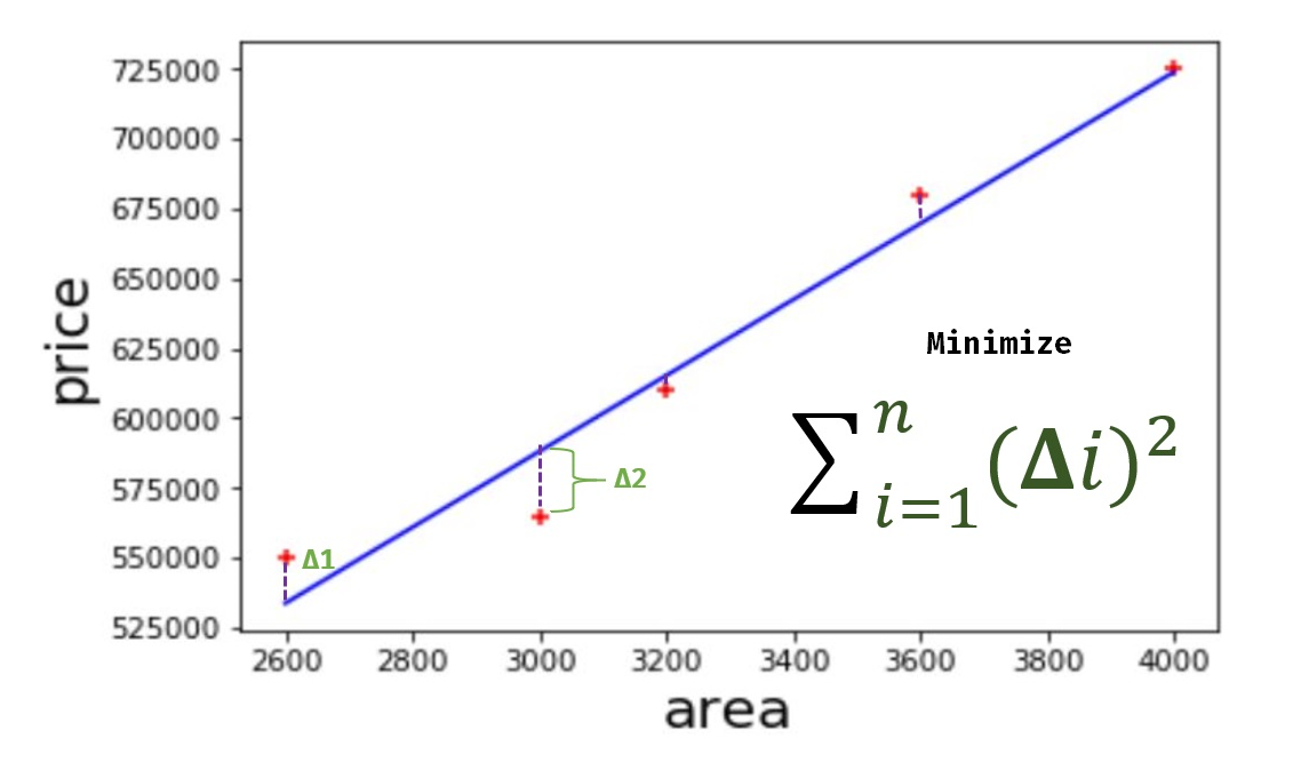

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

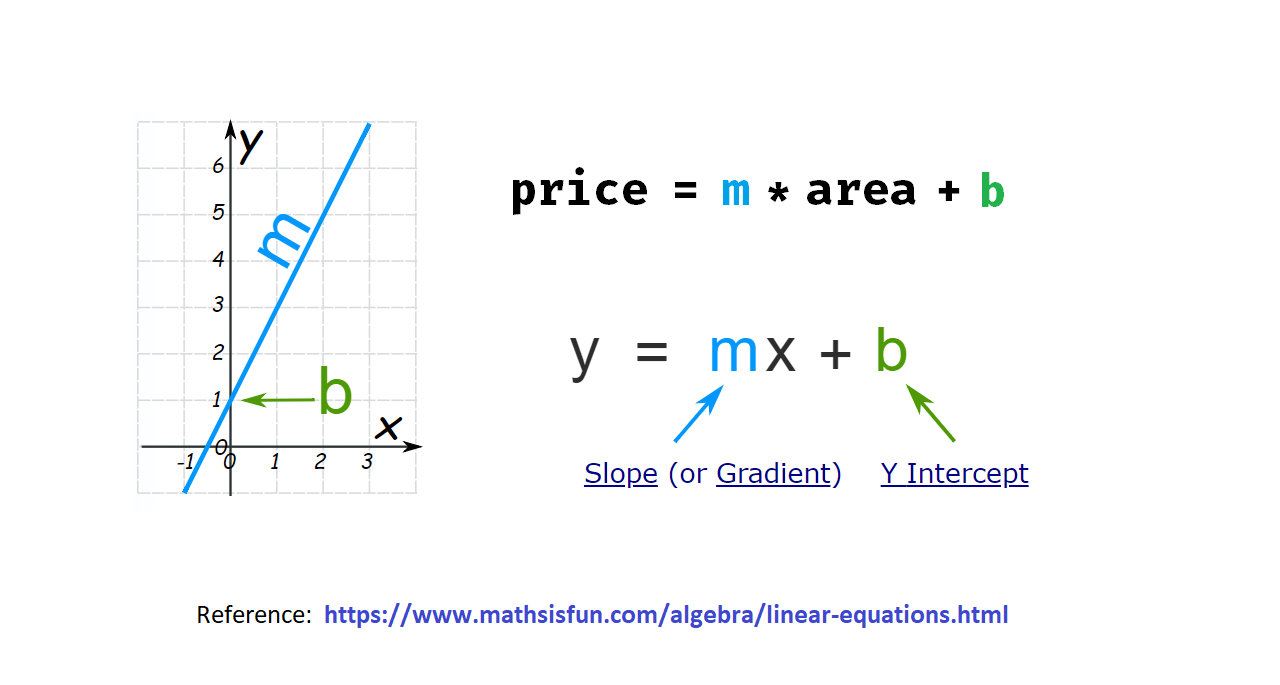

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('homeprices.csv')
df.head(10)

In [ ]:
# Check for uniqueness for area
df['area'].nunique()

In [ ]:
# Check for uniqueness for price
df.price.nunique()

In [ ]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [ ]:
# Extracting the columns
df.columns

## Univariate Analysis

In [ ]:
# 1. For the first case we compare the area(independent) with price(dependent)

In [ ]:
univariate_df = df[['area', 'price']][:5]
univariate_df

In [ ]:
# Extracting our independent variables (area)
univ_X = univariate_df[['area']][0:5]
univ_X

In [ ]:
# Extracting our dependent variable (price)
univ_y = df['price'][0:5]
univ_y

In [ ]:
# Import the necessary metrics to grade our model/algorithm performance
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score,max_error

In [ ]:
from time import time

#Import all the availble regressors
from sklearn.linear_model import LinearRegression, RANSACRegressor,Ridge,Lasso, SGDRegressor,TweedieRegressor
from sklearn.linear_model import ARDRegression, HuberRegressor, PassiveAggressiveRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor 
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
linear_regressors = [
    ARDRegression(), 
    HuberRegressor(),
    LinearRegression(),
    PassiveAggressiveRegressor(),
    RANSACRegressor(),
    Ridge(),
    Lasso(), 
    #SGDRegressor(),
    TheilSenRegressor(),
    TweedieRegressor()
    ]

In [ ]:
# Create a list of the available regressor models
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)

ensemble_regressors = [
    ExtraTreesRegressor(),
    BaggingRegressor(base_estimator=ExtraTreesRegressor()),
    GradientBoostingRegressor(learning_rate=0.3),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    KNeighborsRegressor(),
    VotingRegressor([("gb", reg1), ("rf", reg2)])
]

In [ ]:
# Create a dataframe to store the model training performance
regressor_index = 0
univ_performance_df = pd.DataFrame(columns= 
                        ['train_time','train_score','test_y','test_pred','pred_error(%)','model'])

In [ ]:
# Manualling extraction our test data (from index 5)
test_X = [[3600]] #format must be the same with training data
test_y = 595000 #format must be the same with training data

for model in linear_regressors:
    start = time() # Training time started
    model.fit(univ_X, univ_y)
    train_time = time() - start # Training time ended
    train_score = np.round(model.score(univ_X, univ_y)*100,2)
    
    start = time() # Prediction time started
    y_pred = model.predict(df[['area']][0:5])
    final_df = univariate_df.copy()
    final_df['y_predict'] = np.round(y_pred)
    predict_time = time()-start # Prediction time ended
    
    print(model)
    print("Training time: %0.3fs" % train_time)
    #print(final_df)
    
    # Prediction with the test_X = [[3600]].
    test_pred = np.round(model.predict(test_X),2)
    print(f'Actual value: {test_y}, Predicted value: {test_pred}')
   
    
    pred_error = np.round(((test_y/test_pred)-1)*100,2)
    print(f'Prediction error: {pred_error}%')
    print("Prediction time: %0.3fs" % predict_time)
    print("R2 training score:", model.score(univ_X, univ_y)*100)
    
    univ_performance_df.loc[regressor_index] = \
                            [train_time,train_score,test_y,test_pred.item(),pred_error.item(),model]
    regressor_index +=1
    print()
print('Simulation Completed')


In [ ]:
univ_performance_df

In [ ]:
test_X = [[3600]] #format must be the same with training data
test_y = 595000 #format must be the same with training data

for model in ensemble_regressors:
    start = time() # Training time started
    model.fit(univ_X, univ_y)
    train_time = time() - start # Training time ended
    train_score = np.round(model.score(univ_X, univ_y)*100,2)
    
    start = time() # Prediction time started
    y_pred = model.predict(df[['area']][0:5])
    final_df = univariate_df.copy()
    final_df['y_predict'] = np.round(y_pred)
    predict_time = time()-start # Prediction time ended
    
    print(model)
    print("Training time: %0.3fs" % train_time)
    #print(final_df)
    
    # Prediction with the test_X = [[3600]].
    test_pred = np.round(model.predict(test_X),2)
    print(f'Actual value: {test_y}, Predicted value: {test_pred}')
   
    
    pred_error = np.round(((test_y/test_pred)-1)*100,2)
    print(f'Prediction error: {pred_error}%')
    print("Prediction time: %0.3fs" % predict_time)
    print("R2 training score:", model.score(univ_X, univ_y)*100)
    
    univ_performance_df.loc[regressor_index] = \
                            [train_time,train_score,test_y,test_pred.item(),pred_error.item(),model]
    regressor_index +=1
    print()
print('Simulation Completed')

In [ ]:
# Printing the Dataframe and sorting in decending order by training score
univ_performance_df.sort_values(by=['train_score','pred_error(%)'], ascending=False)

### (1) Predict price of a home with area = 3300 sqr ft

In [ ]:
area_df = pd.read_csv("areas.csv")
area_df.head(10)

In [ ]:
best_predictor = AdaBoostRegressor()
best_predictor.fit(univ_X, univ_y)
pred_vals = np.round(best_predictor.predict(area_df),2)
pred_vals

In [ ]:
area_df['prices']=pred_vals
area_df

In [ ]:
area_df.to_csv("prediction.csv")
print("prediction.csv file successfully created")

## Bivariate Analysis

### Below is the table containing home prices in monroe twp, NJ. Here price depends on area (square feet), bed rooms and age of the home (in years). Given these prices we have to predict prices of new homes based on area and age.

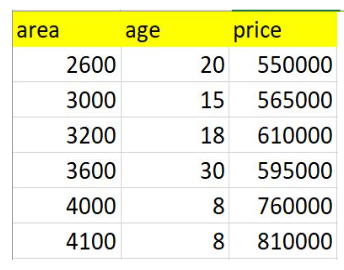

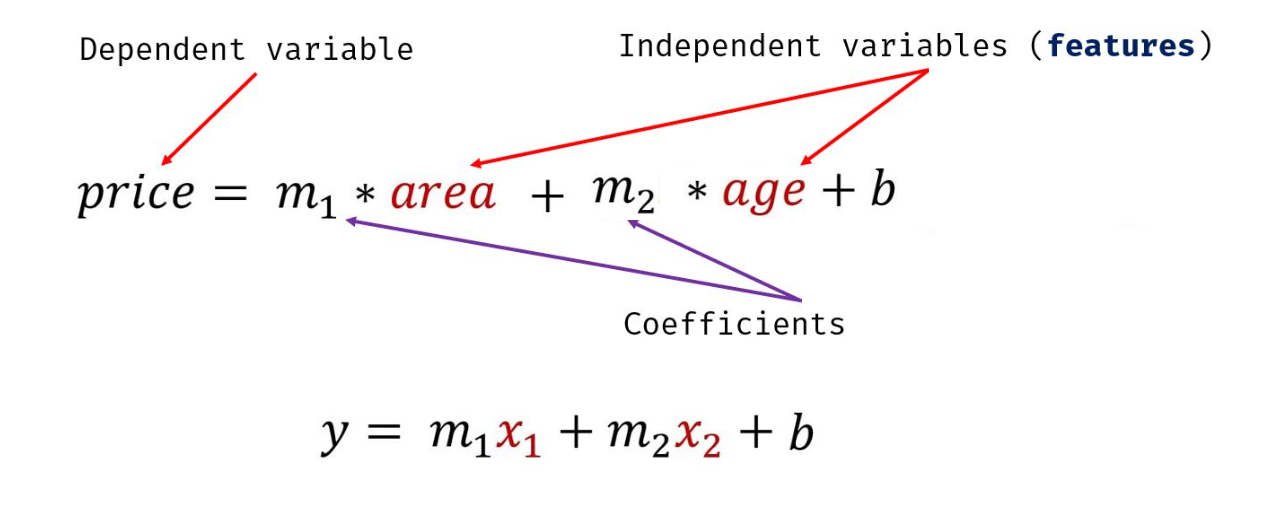

In [ ]:
# 1. For the first case we compare the area and age (independent) with price(dependent)

In [ ]:
bivariate_df = df[['area', 'age', 'price']][0:5]
bivariate_df

In [ ]:
# Extracting the dependent variables (area and price)
biv_X = bivariate_df[['area','age']]
biv_X

In [ ]:
# Extracting the dependent variable (price)
biv_y = df['price'][0:5]
biv_y

In [ ]:
# Create a dataframe to store the model training performance
regressor_index = 0 # for counting iterations
biv_performance_df = pd.DataFrame(columns= 
                        ['train_time','train_score','test_y','test_pred','pred_error(%)','model'])

In [ ]:
test_X = [[3600,30]]
test_y = 595000

for model in linear_regressors:
    start = time() # Training time started
    model.fit(biv_X, biv_y)
    train_time = time() - start # Training time ended
    train_score = np.round(model.score(biv_X, biv_y)*100,2)
    
    start = time() # Prediction time started
    y_pred = model.predict(df[['area','age']][0:5])
    final_df = univariate_df.copy()
    final_df['y_predict'] = np.round(y_pred)
    predict_time = time()-start # Prediction time ended
    
    print(model)
    print("Training time: %0.3fs" % train_time)
    #print(final_df)
    
    # Prediction with the test_X = [[3600]].
    test_pred = np.round(model.predict(test_X),2)
    print(f'Actual value: {test_y}, Predicted value: {test_pred}')
   
    
    pred_error = np.round(((test_y/test_pred)-1)*100,2)
    print(f'Prediction error: {pred_error}%')
    print("Prediction time: %0.3fs" % predict_time)
    print("R2 training score:", model.score(biv_X, biv_y)*100)
    
    biv_performance_df.loc[regressor_index] = \
                            [train_time,train_score,test_y,test_pred.item(),pred_error.item(),model]
    regressor_index += 1
    
    print() 
print('Simulation Completed')


In [ ]:
biv_performance_df

In [ ]:
test_X = [[3600,30]]
test_y = 595000

for model in ensemble_regressors:
    start = time() # Training time started
    model.fit(biv_X, biv_y)
    train_time = time() - start # Training time ended
    train_score = np.round(model.score(biv_X, biv_y)*100,2)
    
    start = time() # Prediction time started
    y_pred = model.predict(df[['area','age']][0:5])
    final_df = univariate_df.copy()
    final_df['y_predict'] = np.round(y_pred)
    predict_time = time()-start # Prediction time ended
    
    print(model)
    print("Training time: %0.3fs" % train_time)
    #print(final_df)
    
    # Prediction with the test_X = [[3600]].
    test_pred = np.round(model.predict(test_X),2)
    print(f'Actual value: {test_y}, Predicted value: {test_pred}')
   
    
    pred_error = np.round(((test_y/test_pred)-1)*100,2)
    print(f'Prediction error: {pred_error}%')
    print("Prediction time: %0.3fs" % predict_time)
    print("R2 training score:", model.score(biv_X, biv_y)*100)
    
    biv_performance_df.loc[regressor_index] = \
                            [train_time,train_score,test_y,test_pred.item(),pred_error.item(),model]
    regressor_index += 1
    
    print() 
print('Simulation Completed')

In [ ]:
# Printing the Dataframe and sorting in decending order by training score
biv_performance_df.sort_values(by=['train_score','pred_error(%)'], ascending=False)

### (1) Predict price of a home with area = 5000 sqr ft and age = 12

In [ ]:
biv_predictor = GradientBoostingRegressor(learning_rate=0.3)
biv_predictor.fit(biv_X, biv_y)

In [ ]:
biv_predictor_score = biv_predictor.score(biv_X, biv_y)
biv_predictor.predict([[5000,12]])

<h2 style="color:green" align="center"> Machine Learning With Python: Linear Regression Multiple Variables</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below is the table containing home prices in monroe twp, NJ. Here price depends on area (square feet), bed rooms and age of the home (in years). Given these prices we have to predict prices of new homes based on area, bed rooms and age.

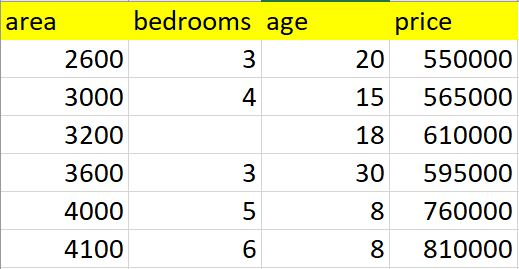

Given these home prices find out price of a home that has,

**3000 sqr ft area, 3 bedrooms, 40 year old**

**2500 sqr ft area, 4 bedrooms,  5 year old**

#### We will use regression with multiple variables here. Price can be calculated using following equation,


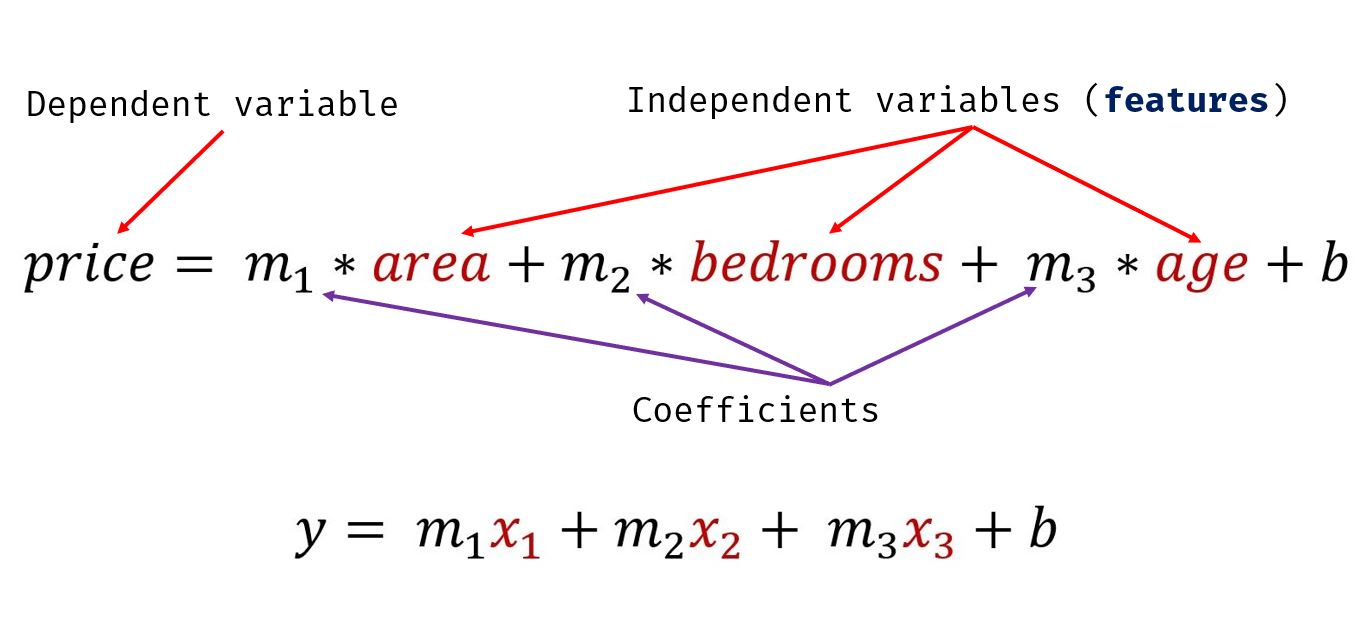

In [ ]:
multivariate_df = df[['area', 'bedrooms', 'age', 'price']]
multivariate_df

In [ ]:
# Extracting the column names
multivariate_df.columns

In [ ]:
# Identifiying columns with Nan Values
for cols in multivariate_df.columns:
    print(f'\t{cols:<10}: {multivariate_df[cols].isna().sum()} NaN Values')

### Data Preprocessing: Fill NA values with median value of a column

In [ ]:
multivariate_df.bedrooms.median()

In [ ]:
multivariate_df.bedrooms = multivariate_df.bedrooms.fillna(multivariate_df.bedrooms.median())
multivariate_df

In [ ]:
# Identifiying columns with Nan Values
for cols in multivariate_df.columns:
    print(f'\t{cols:<10}: {multivariate_df[cols].isna().sum()} NaN Values')

In [ ]:
# Extracting the dependent variables (area and price)
multiv_X = multivariate_df[['area','bedrooms','age']]
multiv_X

In [ ]:
# Extracting the dependent variable (price)
multiv_y = multivariate_df['price']
multiv_y

In [ ]:
# Create a list of the available linear regressor models
linear_regressors = [
    ARDRegression(), 
    HuberRegressor(),
    LinearRegression(),
    PassiveAggressiveRegressor(),
    RANSACRegressor(),
    Ridge(),
    Lasso(), 
    #SGDRegressor(),
    TheilSenRegressor(),
    TweedieRegressor()
    ]

In [ ]:
# Create a list of the available ensemble regressor models
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)

ensemble_regressors = [
    ExtraTreesRegressor(),
    BaggingRegressor(base_estimator=ExtraTreesRegressor()),
    GradientBoostingRegressor(learning_rate=0.3),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    KNeighborsRegressor(),
    VotingRegressor([("gb", reg1), ("rf", reg2)])
]

In [ ]:
# Extracting the training data from the Dataframe
train_X = multiv_X[0:5] # row o to 4 (5 records)
train_y = multiv_y[0:5] # row o to 4 (5 records)

In [ ]:
train_X

In [ ]:
train_y

In [ ]:
# Extracting the test data from the Dataframe
test_X = multiv_X[5:] # row 5 toend (1 record)
test_y = multiv_y[5:] # row 5 toend (1 record)
test_X

In [ ]:
test_y

In [ ]:
# Create a dataframe to store the model training performance
regressor_index = 0 # for counting iterations
multiv_performance_df = pd.DataFrame(columns= 
                        ['train_time','train_score','test_y','test_pred','pred_error(%)','model'])

In [ ]:

# Iterating over linear regressors
for model in linear_regressors:
    #Training the model (each regressors)
    start = time()
    model.fit(train_X, train_y)
    train_time = time() - start
    train_score = np.round(model.score(train_X, train_y)*100,2)
    
    #predicting the entire train data
    start = time()
    y_pred = model.predict(train_X)
    final_df = multivariate_df[0:5].copy()
    final_df['y_predict'] = y_pred
    print(model)
    print("Training time: %0.3fs" % train_time)
    #print(final_df)
    
    # Testing the model on test data
    test_pred = np.round(model.predict(test_X),2)
    #test_y.values[0] returns the actual test_y value: 595000
    print(f'Actual value: {test_y.values[0]}, Predicted value: {np.round(test_pred[0])}')
    predict_time = time()-start 
    pred_error = np.round(((test_y/test_pred)-1)*100,2)
    
    #pred_error.item() is used to return item in an np array
    print(f'Prediction error: {np.round(pred_error.item(),2)}%')
    print("Prediction time: %0.3fs" % predict_time)
    print(f"R2 training score: {np.round(model.score(train_X, train_y),4)*100}%")
    multiv_performance_df.loc[regressor_index] = \
                        [train_time,train_score,test_y.values[0],test_pred.item(),pred_error.item(),model]
    regressor_index += 1
    print()
print('Simulation Completed')

In [ ]:
multiv_performance_df.sort_values(by=['train_score','pred_error(%)'], ascending=False)

In [ ]:
# Iterating over ensemble regressors
for model in ensemble_regressors:
    #Training the model (each regressors)
    start = time()
    model.fit(train_X, train_y)
    train_time = time() - start
    train_score = np.round(model.score(train_X, train_y)*100,2)
    
    #predicting the entire train data
    start = time()
    y_pred = model.predict(train_X)
    final_df = multivariate_df[0:5].copy()
    final_df['y_predict'] = y_pred
    print(model)
    print("Training time: %0.3fs" % train_time)
    #print(final_df)
    
    # Testing the model on test data
    test_pred = np.round(model.predict(test_X),2)
    #test_y.values[0] returns the actual test_y value: 595000
    print(f'Actual value: {test_y.values[0]}, Predicted value: {np.round(test_pred[0])}')
    predict_time = time()-start 
    pred_error = np.round(((test_y/test_pred)-1)*100,2)
    
    #pred_error.item() is used to return item in an np array
    print(f'Prediction error: {np.round(pred_error.item(),2)}%')
    print("Prediction time: %0.3fs" % predict_time)
    print(f"R2 training score: {np.round(model.score(train_X, train_y),4)*100}%")
    multiv_performance_df.loc[regressor_index] = \
                        [train_time,train_score,test_y.values[0],test_pred.item(),pred_error.item(),model]
    regressor_index += 1
    print()
print('Simulation Completed')

In [ ]:
multiv_performance_df.sort_values(by=['train_score','pred_error(%)'], ascending=False)

In [ ]:
# Using the best model for prediction
multivariate_predictor =  ExtraTreesRegressor(random_state=1720861042)
multivariate_predictor.fit(train_X, train_y)

In [ ]:
y_pred = multivariate_predictor.predict(multivariate_df[['area','bedrooms','age']][0:5])
multivariate_df = df[0:5].copy()
multivariate_df['y_predict'] = y_pred
multivariate_df

**Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old**

In [ ]:
X_test =[[3000, 3, 40]]
multivariate_predictor.predict(X_test)

**Find price of home with 2500 sqr ft area, 4 bedrooms,  5 year old**

In [ ]:
multivariate_predictor.predict([[2500, 4, 5]])